In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin
import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy as np
from scipy import stats

In [2]:
# Import dataset
df = pd.read_csv('Data/housing.csv')
# Check datatypes of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [3]:
# Check for distortions
# Check for negative values
for col in df.columns:
    if df[col].dtype != object:
        if (df[col] >= 0).all():
            print(f"{col} is non-negative")

latitude is non-negative
housing_median_age is non-negative
total_rooms is non-negative
population is non-negative
households is non-negative
median_income is non-negative
median_house_value is non-negative


In [4]:
# Print the descriptions for ocean proximity
print(df['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [5]:
df[df.isna().any(axis=1)]
# All outliers are in total_bedrooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


<AxesSubplot:>

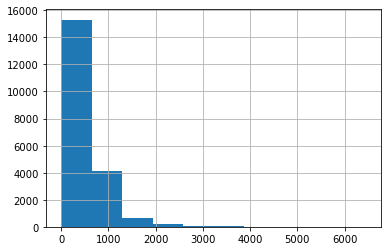

In [6]:
df['total_bedrooms'].hist()

In [7]:
# Estimate missing values
# Compute a ratio of total bedrooms to total rooms and take the mean of it
df_red = df[~df.isna().any(axis=1)]
df_red['bedroom_per_room'] = df_red['total_bedrooms']/df_red['total_rooms']
mean_b_r = df_red['bedroom_per_room'].mean()

# Estimate missing values in total bedrooms from total room attribute
df_est = df
df_est.loc[df.isna().any(axis=1), 'total_bedrooms'] = df.loc[df.isna().any(axis=1), 'total_rooms'] * mean_b_r 

<AxesSubplot:>

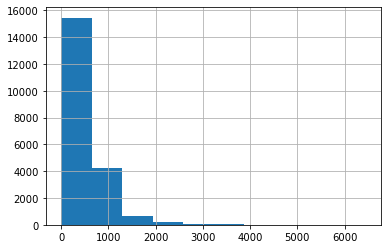

In [8]:
#Check if distribution is the same
df_est['total_bedrooms'].hist()

In [9]:
# compute basic summary statistics and export to excel
df_desc = df_est.describe()
df_desc.to_excel('df_desc.xlsx')
df_desc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.951423,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.989486,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,648.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


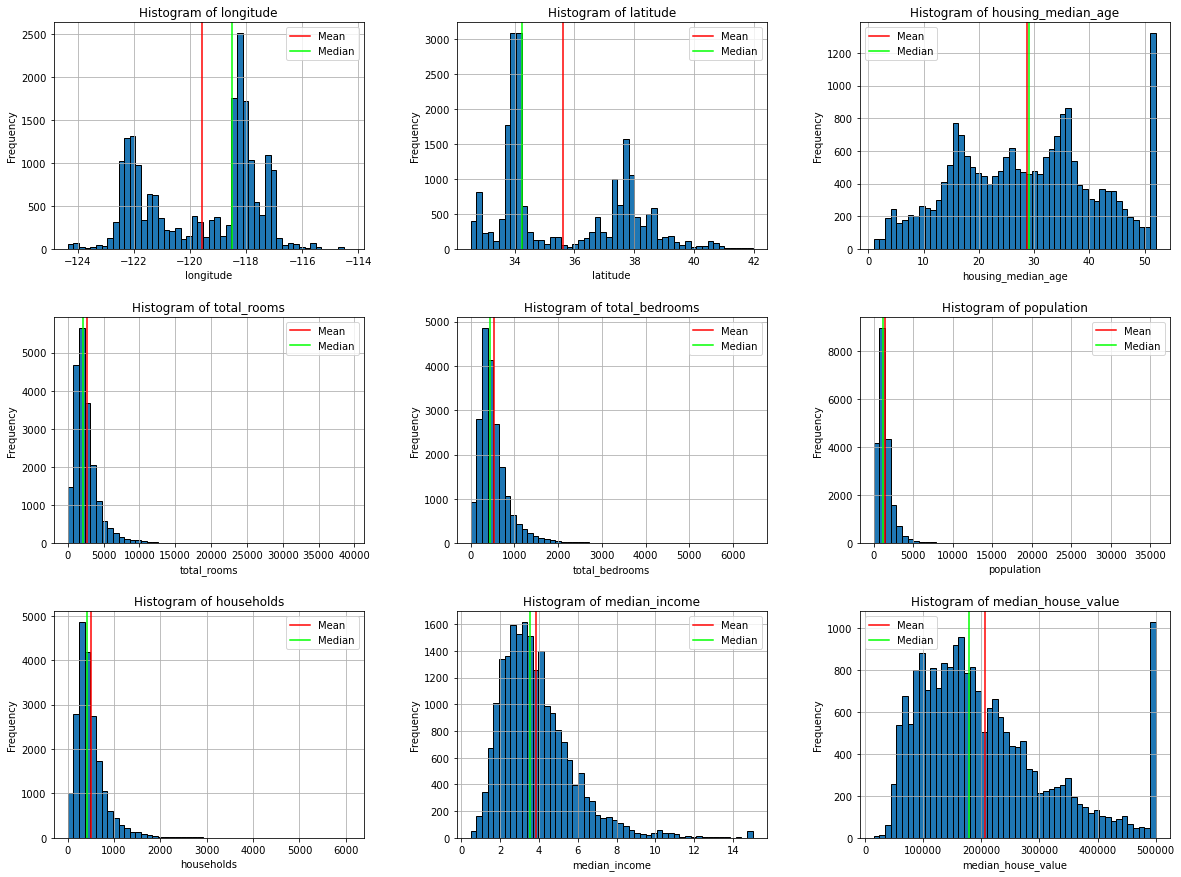

In [10]:
# Histograms to show distributions
plt.figure(figsize=(20, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i, col in enumerate(df_est.columns):
    if col=="ocean_proximity":
        continue
    plt.subplot(3,3,i+1)
    df_est[col].plot.hist(bins=50, grid=True, edgecolor='black')
    plt.xlabel(col);
    mu = df_est[col].mean()
    med = df_est[col].median()
    plt.axvline(x=mu, ymin=0, ymax=6000, color='r')
    plt.axvline(x=med, ymin=0, ymax=6000, color='lime')
    plt.legend(['Mean', 'Median'])
    plt.title(f'Histogram of {col}')
    
plt.savefig('Plots/hist_matrix.png', dpi = 300)

# housing median age and meedian house value have a sudden peak at 
# the right hand side --> Outliers

In [11]:
# Add new features

df_add = df_est
df_add['rooms_per_household'] = df_add['total_rooms'] / df_add['households']
df_add['bedrooms_per_room'] = df_add['total_bedrooms'] / df_add['total_rooms']
df_add['population_per_household']= df_add['population'] / df_add['households']

# Filter outliers

df_trans = df_add
df_trans = df_trans[(df_trans['median_house_value']!=500001) | (df_trans['median_income']>=2)].reset_index(drop=True)
df_trans = df_trans[df_trans['median_income']<=11].reset_index(drop=True)
df_trans = df_trans[(df_trans['median_house_value']!=350000) | (df_trans['median_income']>=1.5)].reset_index(drop=True)
df_trans = df_trans[(df_trans['median_house_value']!=450000) | (df_trans['median_income']>=2)].reset_index(drop=True)
df_trans = df_trans[(df_trans['median_house_value']>=350000) | (df_trans['median_income']<=9.5)].reset_index(drop=True)
df_trans = df_trans[df_trans['population']<=9000]
df_trans = df_trans[(df_trans['population_per_household']>=1.15) & (df_trans['population_per_household']<=6.5)]
df_trans = df_trans[df_trans['rooms_per_household']<20]
df_trans = df_trans[df_trans['bedrooms_per_room']<0.5].reset_index(drop=True)

# Scale features
df_trans['median_income'] = df_trans['median_income'].multiply(10000)

# Drop old attributes since we substitute them with the new generated attributes
df_trans = df_trans.drop(['total_rooms', 'total_bedrooms', 'population'], axis=1)

In [22]:
df_trans.to_csv('Data/housing_clean.csv', index=False)

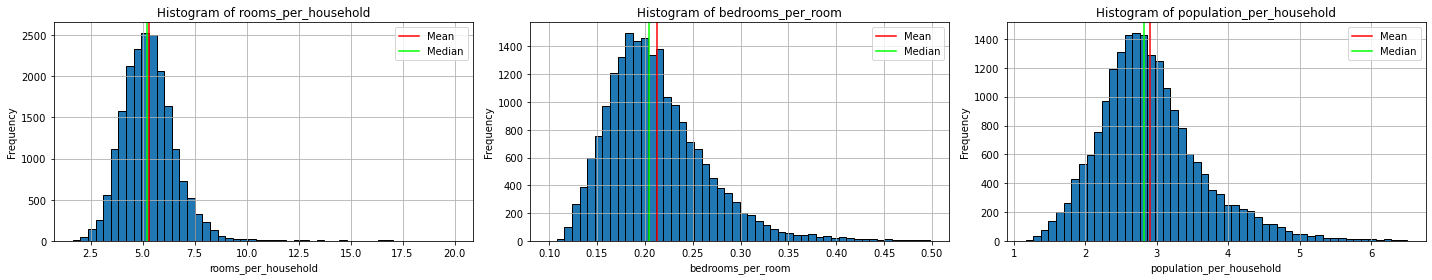

In [12]:
# Check histograms with new attributes

df_red = df_trans[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']]

plt.figure(figsize=(20,4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i, col in enumerate(df_red.columns):
    if col=="ocean_proximity":
        continue
    plt.subplot(1,3,i+1)
    df_red[col].plot.hist(bins=50, grid=True, edgecolor='black')
    plt.xlabel(col);
    mu = df_red[col].mean()
    med = df_red[col].median()
    plt.axvline(x=mu, ymin=0, ymax=6000, color='r')
    plt.axvline(x=med, ymin=0, ymax=6000, color='lime')
    plt.legend(['Mean', 'Median'])
    plt.title(f'Histogram of {col}')
plt.tight_layout()
    
plt.savefig('Plots/3.histogram_new_attr.png', dpi = 300)

In [13]:
corr_matrix = df_trans.corr()
corr_matrix.round(2)

,longitude,latitude,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.00,-0.93,-0.11,0.05,-0.02,-0.05,-0.05,0.10,0.18
latitude,-0.93,1.00,0.01,-0.07,-0.08,-0.15,0.12,-0.12,-0.17
housing_median_age,-0.11,0.01,1.00,-0.31,-0.15,0.11,-0.23,0.14,-0.00
households,0.05,-0.07,-0.31,1.00,0.03,0.08,-0.08,0.09,-0.14
median_income,-0.02,-0.08,-0.15,0.03,1.00,0.69,0.57,-0.66,-0.08
median_house_value,-0.05,-0.15,0.11,0.08,0.69,1.00,0.25,-0.27,-0.28
rooms_per_household,-0.05,0.12,-0.23,-0.08,0.57,0.25,1.00,-0.73,-0.05
bedrooms_per_room,0.10,-0.12,0.14,0.09,-0.66,-0.27,-0.73,1.00,0.00
population_per_household,0.18,-0.17,-0.00,-0.14,-0.08,-0.28,-0.05,0.00,1.00


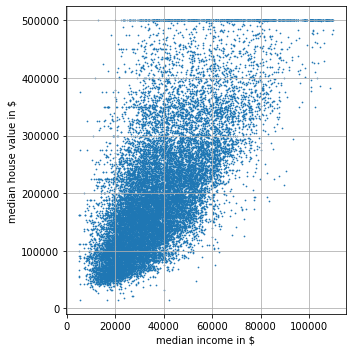

In [14]:
sub_corr_matrix = corr_matrix[['median_income', 'median_house_value']].round(2)
plt.figure(figsize=(5,5))
plt.scatter(df_trans['median_income'], df_trans['median_house_value'], s=0.5)
plt.grid()
plt.xlabel('median income in $');
plt.ylabel('median house value in $');
plt.tight_layout()
plt.savefig('Plots/3.correlation_scatter.png', dpi = 300)

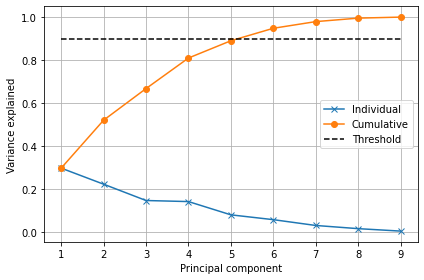

In [15]:
pca_data = df_trans.loc[:, df_trans.columns != 'ocean_proximity'].to_numpy()

# Subtract mean value from data and divide by std.deviation (standard)
Y1 = pca_data - np.ones((pca_data.shape[0],1))*pca_data.mean(axis=0)
Y2 = Y1*(1/np.std(Y1,0))

# PCA by computing SVD of Y
U,S,Vh = svd(Y2,full_matrices=False)
V = Vh.T  

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 
threshold = 0.90

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.tight_layout()
plt.savefig('Plots/3.PCA_variance_explained.png', dpi = 300)
plt.show()


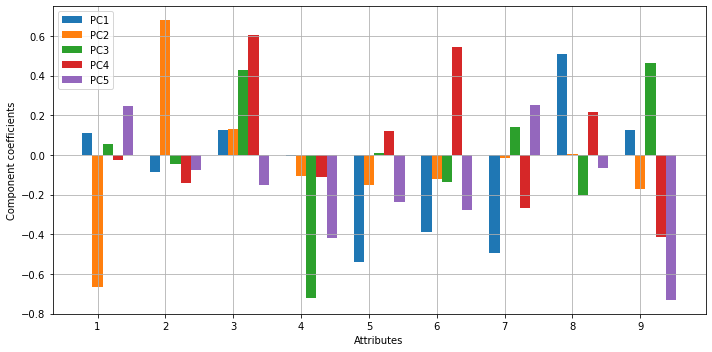

In [16]:
# Visualize principal directions
plt.figure(figsize=(10,5))
pcs = [0,1,2,3,4]
legendStrs = ['PC'+str(e+1) for e in pcs]
bw = 0.15
r = np.arange(1,10)
for i in pcs:    
    plt.bar(r+i*bw, height=V[:,i], width=bw)
plt.xticks(r+bw, r)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.tight_layout()
plt.savefig('Plots/3.principal_directions.png', dpi = 300)
plt.show()

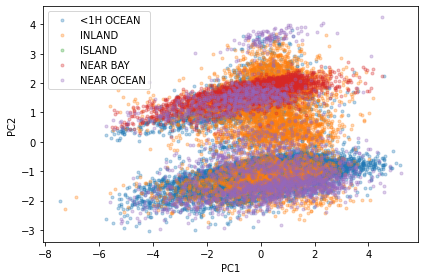

In [17]:
classLabels = df_trans.iloc[:,6]
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(5)))
C = len(classNames)
y = np.asarray([classDict[value] for value in classLabels])

# Indices of the principal components to be plotted
i = 0
j = 1

# Project the centered data onto principal component space
Z = Y2 @ V

# Plot PCA of the data 2D
f = plt.figure()
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Z[class_mask,i], Z[class_mask,j], '.', alpha=.3)
plt.legend(classNames)
plt.xlabel('PC{0}'.format(i+1))
plt.ylabel('PC{0}'.format(j+1))
plt.tight_layout()
plt.savefig('Plots/3.PCA_projection.png', dpi=300);
plt.show()
